# Binary Classification Model for [Project Name] Using Python version 06
### David Lowe
### December 10, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: [Sample Paragraph - The purpose of this project is to construct prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Pima Indians Diabetes dataset is a classic binary classification situation where we are trying to predict one of the two possible outcomes.]

INTRODUCTION: [Sample Paragraph - This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.]

ANALYSIS: [Sample Paragraph - The baseline performance of the ten algorithms achieved an average accuracy of 75.32%. Three algorithms (Logistic Regression, Bagged CART, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Bagged CART turned in the top result using the training data. It achieved an average accuracy of 81.19%. Using the optimized tuning parameter available, the Bagged CART algorithm processed the validation dataset with an accuracy of 68.39%, which was worst than the training data and possibly due to over-fitting.]

CONCLUSION: [Sample Paragraph - For this iteration, the AdaBoost algorithm achieved the top-tier training and validation results. For this dataset, AdaBoost should be considered for further modeling or production use.]

Dataset Used: Pima Indians Diabetes Database

Dataset ML Model: Binary classification with [numerical | categorical] attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

One potential source of performance benchmark: https://www.kaggle.com/uciml/pima-indians-diabetes-database

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [1]:
import math
import numpy as np
import pandas as pd
import smtplib
from email.message import EmailMessage
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from sklearn.feature_selection import RFE
from datetime import datetime

# Create one random seed number for reproducible results
seedNum = 888

/home/davidlowe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1.b) Set up the email notification function

In [2]:
def email_notify(msg_text):
    sender = "luozhi2488@gmail.com"
    receiver = "dave@contactdavidlowe.com"
    with open('email_credential.txt') as f:
        password = f.readline()
        f.close()
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Python Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(sender, password)
    server.send_message(msg)
    server.quit()

In [3]:
email_notify("Library and Data Loading has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 1.c) Load dataset

In [4]:
startTimeScript = datetime.now()

inputFile = 'pima-indians-diabetes.data.csv'
colNames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome']
xy_original = read_csv(inputFile, names=colNames)

In [5]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

In [6]:
# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

# Standardize the class column to the name of targetVar if the column name is known
xy_original = xy_original.rename(columns={'outcome': 'targetVar'})

In [7]:
# We create training datasets (xy_train, x_train, y_train) for various operations
# We create validation datasets (xy_test, x_test, y_test) for various operations
# Use 70% of the data to train the models and the remaining for testing/validation
array = xy_original.values
x_original = array[:,0:totAttr]
y_original = array[:,totAttr]
validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=validation_size, random_state=seedNum)
print("x_original.shape: {} y_original.shape: {}".format(x_original.shape, y_original.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_original.shape: (768, 8) y_original.shape: (768,)
x_train.shape: (537, 8) y_train.shape: (537,)
x_test.shape: (231, 8) y_test.shape: (231,)


### 1.d) Set up the key parameters to be used in the script

In [8]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [9]:
email_notify("Library and Data Loading completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

In [10]:
email_notify("Data Summarization and Visualization has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 2.a) Descriptive statistics

#### 2.a.i) Peek at the data itself.

In [11]:
xy_original.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,targetVar
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### 2.a.ii) Dimensions of the dataset.

In [12]:
xy_original.shape

(768, 9)

#### 2.a.iii) Types of the attributes.

In [13]:
xy_original.dtypes

preg           int64
plas           int64
pres           int64
skin           int64
test           int64
mass         float64
pedi         float64
age            int64
targetVar      int64
dtype: object

#### 2.a.iv) Statistical summary of all attributes.

In [14]:
xy_original.describe()

,preg,plas,pres,skin,test,mass,pedi,age,targetVar
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2.a.v) Count missing values.

In [15]:
xy_original.isnull().sum()

preg         0
plas         0
pres         0
skin         0
test         0
mass         0
pedi         0
age          0
targetVar    0
dtype: int64

#### 2.a.vi) Summarize the levels of the class attribute.

In [16]:
xy_original.groupby('targetVar').size()

targetVar
0    500
1    268
dtype: int64

### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [17]:
x_original = xy_original.drop(columns=['targetVar'])

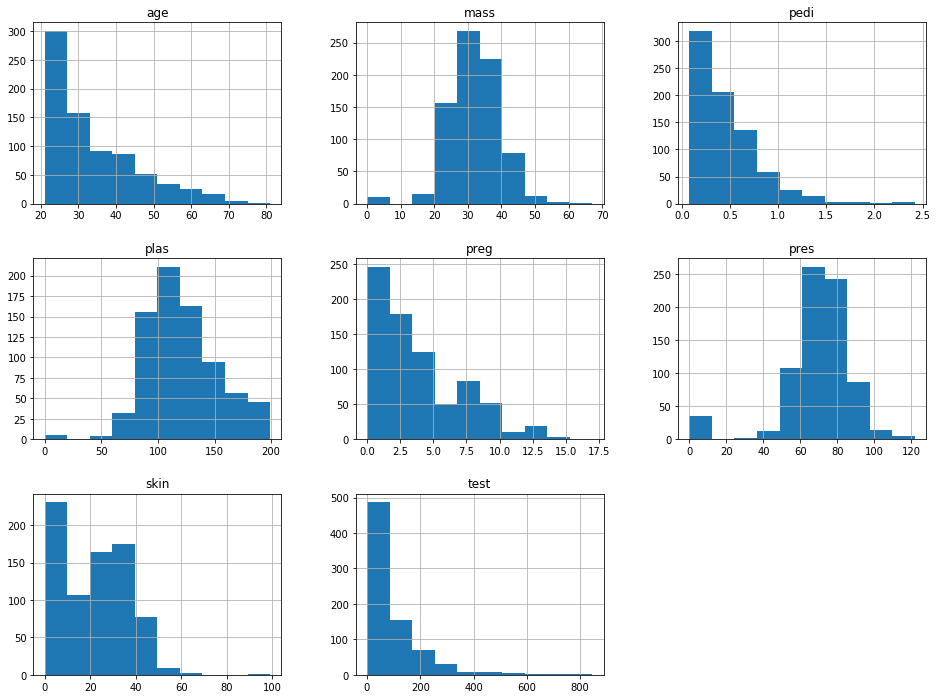

In [18]:
# Histograms for each attribute
x_original.hist()
pyplot.show()

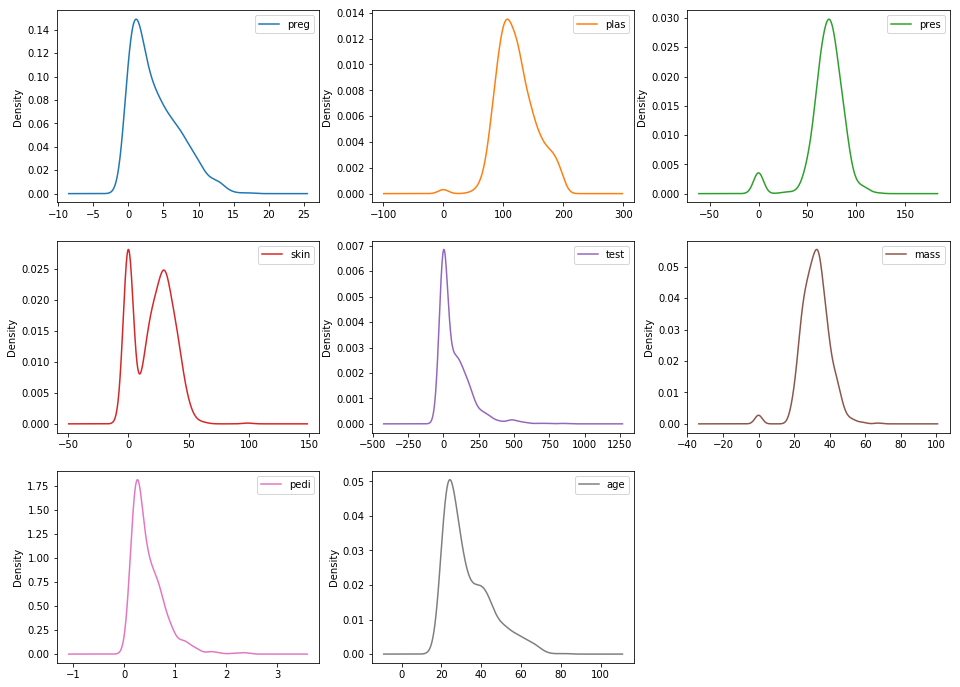

In [19]:
# Density plot for each attribute
x_original.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

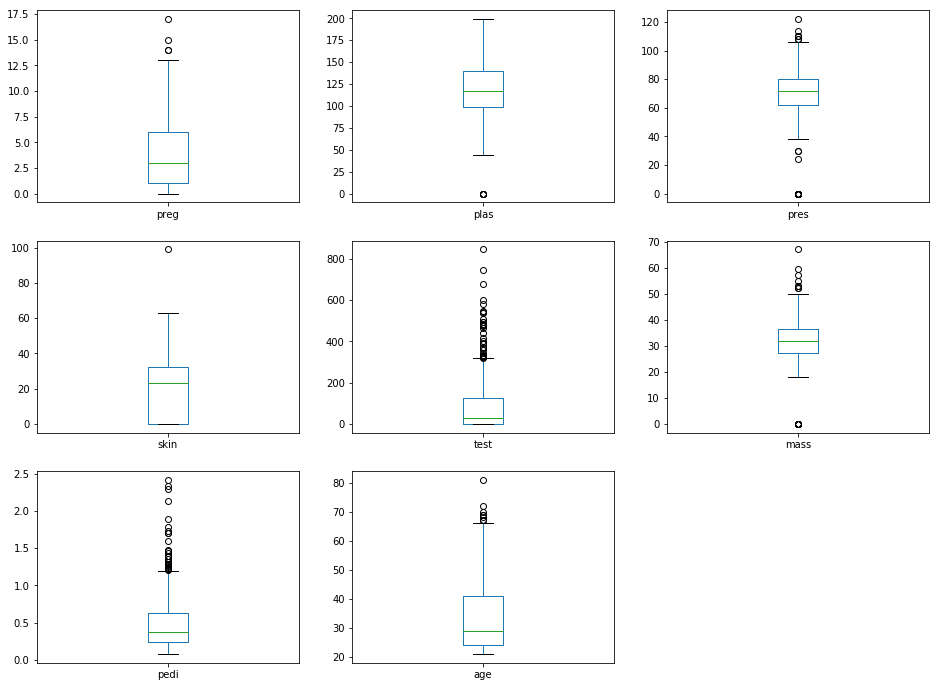

In [20]:
# Box and Whisker plot for each attribute
x_original.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

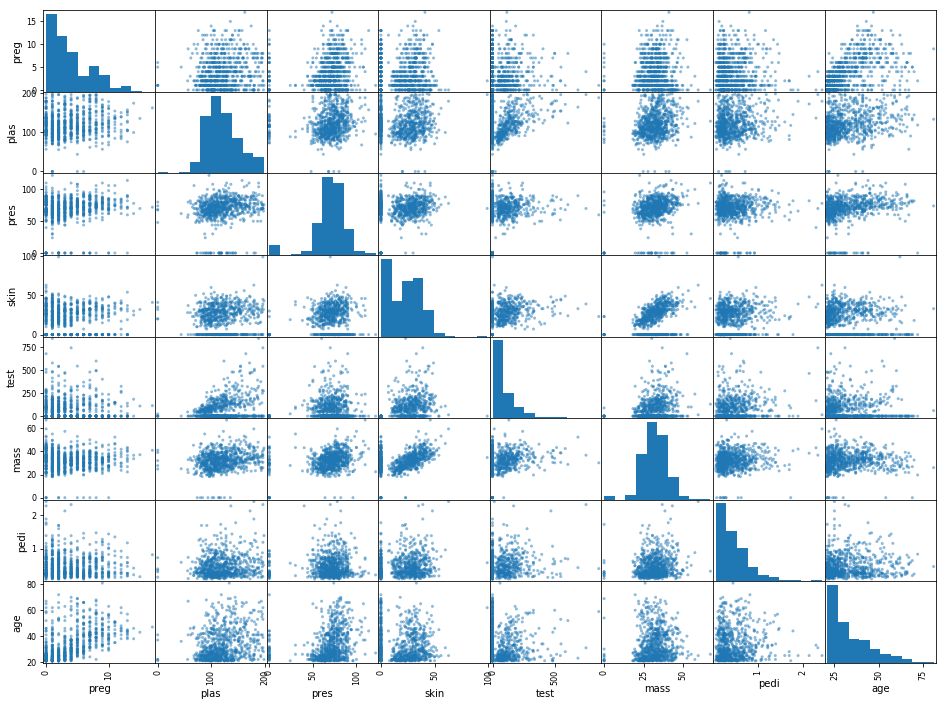

In [21]:
# Scatterplot matrix
scatter_matrix(x_original)
pyplot.show()

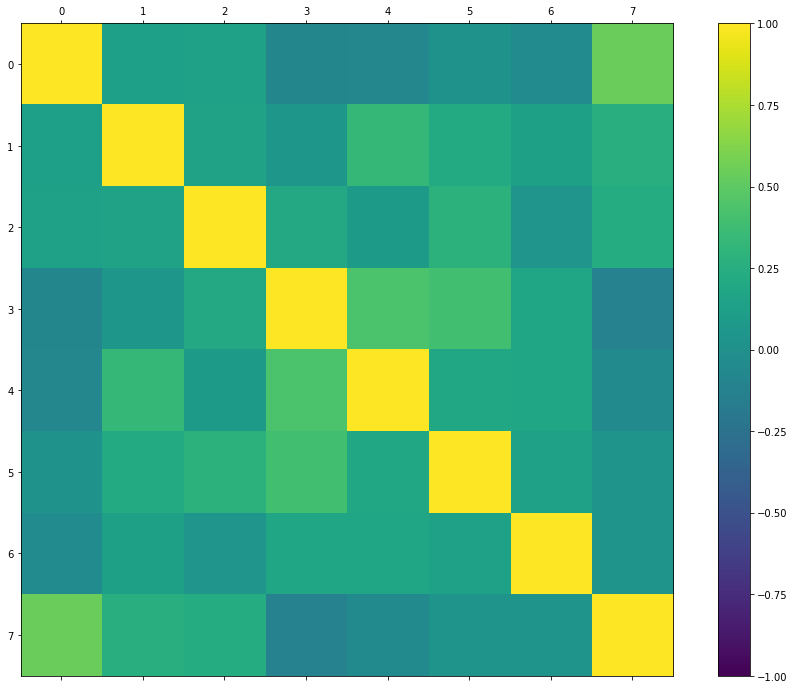

In [22]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x_original.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [23]:
email_notify("Data Summarization and Visualization completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

In [24]:
email_notify("Data Cleaning and Transformation has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 3.a) Data Cleaning

In [25]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [26]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [27]:
# Not applicable for this iteration of the project.

In [28]:
email_notify("Data Cleaning and Transformation completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, three non-linear and four ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged CART, Random Forest, Extra Trees, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [29]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [30]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [31]:
# Generate model in turn
for name, model in models:
	email_notify("Algorithm "+name+" modeling has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
	email_notify("Algorithm "+name+" modeling completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.785919 (0.029720)
Model training time: 0:00:00.046702
CART: 0.711321 (0.042103)
Model training time: 0:00:00.024830
KNN: 0.745143 (0.051507)
Model training time: 0:00:00.017045
SVM: 0.664815 (0.041524)
Model training time: 0:00:00.119899
BT: 0.778721 (0.051014)
Model training time: 0:00:00.207374
RF: 0.759923 (0.039289)
Model training time: 0:00:00.153231
ET: 0.752551 (0.043588)
Model training time: 0:00:00.142474
GBM: 0.793536 (0.065889)
Model training time: 0:00:00.788490
Average metrics (accuracy) from all models: 0.7489910901467505


### 4.b) Spot-checking baseline algorithms

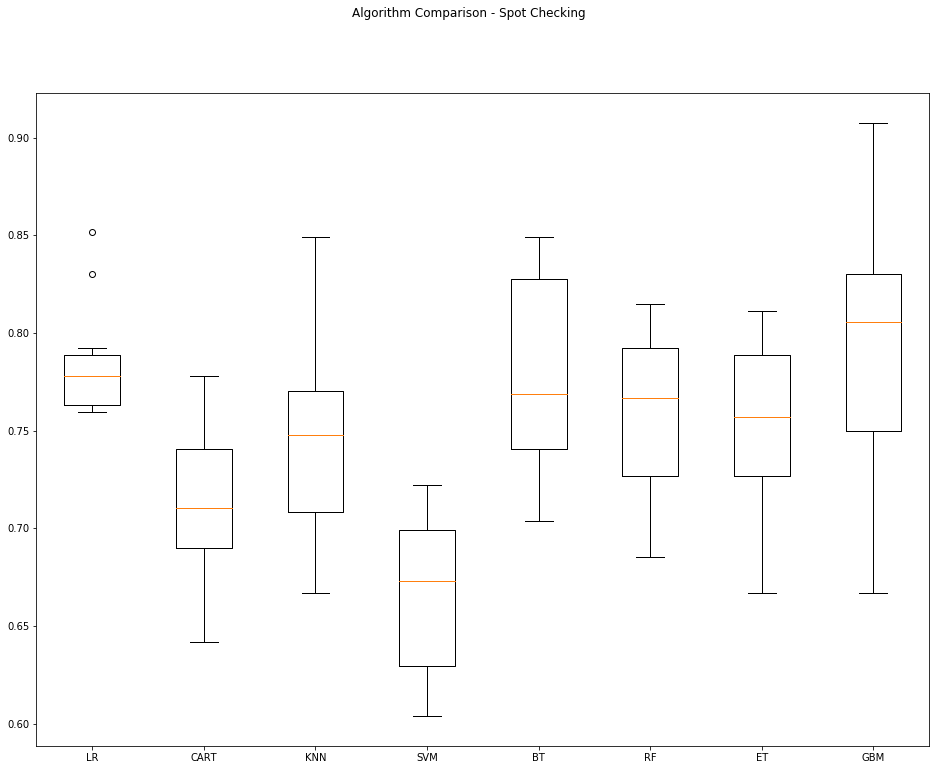

In [32]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [33]:
# Set up the comparison array
results = []
names = []

In [34]:
# Tuning algorithm #1 - Bagged CART
email_notify("Algorithm #1 tuning has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([10,25,50,100,200]))
model1 = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BT')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))
email_notify("Algorithm #1 tuning completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

Best: 0.811918 using {'n_estimators': 100}
0.778399 (0.050955) with: {'n_estimators': 10}
0.797020 (0.046105) with: {'n_estimators': 25}
0.797020 (0.035491) with: {'n_estimators': 50}
0.811918 (0.047828) with: {'n_estimators': 100}
0.797020 (0.046211) with: {'n_estimators': 200}
Model training time: 0:00:08.097498


In [35]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
email_notify("Algorithm #2 tuning has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([50,100,150,200,250]))
model2 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))
email_notify("Algorithm #2 tuning completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

Best: 0.793296 using {'n_estimators': 100}
0.787709 (0.060014) with: {'n_estimators': 50}
0.793296 (0.065991) with: {'n_estimators': 100}
0.793296 (0.063821) with: {'n_estimators': 150}
0.782123 (0.071089) with: {'n_estimators': 200}
0.776536 (0.068998) with: {'n_estimators': 250}
Model training time: 0:00:06.064870


### 5.b) Compare Algorithms After Tuning

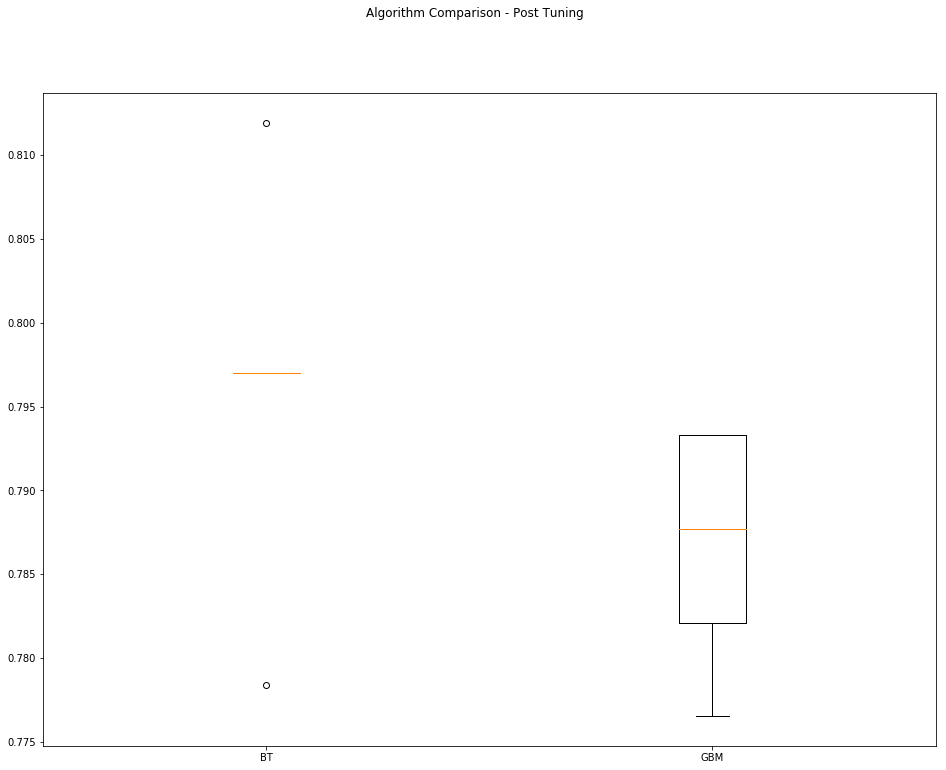

In [36]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

In [37]:
email_notify("Model Validation and Final Model Creation has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 6.a) Predictions on validation dataset

In [38]:
model = BaggingClassifier(n_estimators=100, random_state=seedNum)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.683982683982684
[[118  25]
 [ 48  40]]
             precision    recall  f1-score   support

        0.0       0.71      0.83      0.76       143
        1.0       0.62      0.45      0.52        88

avg / total       0.67      0.68      0.67       231



### 6.b) Create standalone model on entire training dataset

In [39]:
startTimeModule = datetime.now()
finalModel = BaggingClassifier(n_estimators=100, random_state=seedNum)
finalModel.fit(x_original, y_original)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.248895


### 6.c) Save model for later use

In [40]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

In [41]:
email_notify("Model Validation and Final Model Creation completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:01:02.778118
